In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.optimizers import Adam

import pandas as pd
import os
import re
import path
import cv2
import glob
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
im_size = 4096

In [3]:
#Mnist data extract and train-test split
mnist = input_data.read_data_sets('../data/MNIST_data', one_hot=True)
X_train, _ = mnist.train.images, mnist.train.labels
X_test,_ = mnist.test.images, mnist.test.labels

Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
#3 layer Vanilla AutoEncoder
inputs = Input(shape=(784,))
h = Dense(64, activation='sigmoid')(inputs)
outputs = Dense(784)(h)

model = Model(input=inputs, output=outputs)
model.compile(optimizer='adam', loss='mse')
model.fit(X, X, batch_size=64, nb_epoch=5)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/5
55000/55000 [==============================] - 2s 31us/step - loss: 0.0333
Epoch 2/5
55000/55000 [==============================] - 1s 26us/step - loss: 0.0145
Epoch 3/5
55000/55000 [==============================] - 1s 26us/step - loss: 0.0115
Epoch 4/5
55000/55000 [==============================] - 1s 26us/step - loss: 0.0107
Epoch 5/5
55000/55000 [==============================] - 1s 25us/step - loss: 0.0104


In [54]:
X_pred = model.predict(X_test)

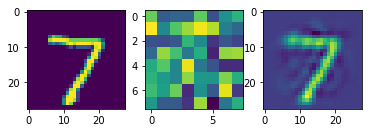

In [55]:
plt.figure(1)
plt.subplot(131)
plt.imshow(X_test[0].reshape(28,28))
plt.subplot(132)
plt.imshow(layer_output[0].reshape(8,8))
plt.subplot(133)
plt.imshow(X_pred[0].reshape(28,28))


plt.show()


In [6]:
seq = [str(i).zfill(4) for i in range(1,11)]

In [7]:
images = []
d= {}
for s in seq:
    for file in glob.glob('GSCdata/'+s+'*png'):
        images.append(cv2.imread(file,0))
#     images = cv2.imread(file,0) for file in glob.glob('GSCdata/'+s+'*png')]
#     names = [re.sub('\.png$', '',os.path.basename(x)) for x in glob.glob('GSCdata/'+s+'*png')]
images = np.array(images)
print(images.shape)
#     if(len(images)>2):
#         train, test = np.array(train).reshape(-1,im_size), np.array(test).reshape(-1,im_size)
#         inputs = Input(shape=(4096,))
#         h = Dense(128, activation='sigmoid')(inputs)
#         outputs = Dense(4096)(h)

#         model = Model(input=inputs, output=outputs)
#         model.compile(optimizer='adam', loss='mse')
#         model.fit(images, images, batch_size=64, nb_epoch=2000)
#         # Getting output of hidden layer

#         hidden_layer_output = K.function([model.layers[0].input],[model.layers[1].output])
#         layer_output = hidden_layer_output([images])
#         layer_output = np.array(layer_output).reshape(-1,128)
        
#         wd = dict(zip(names, layer_output))
#         d = {**d, **wd}
# df = pd.DataFrame.from_dict(d, orient="index")
# df.to_csv("features.csv")

(118, 64, 64)


In [28]:
# train, test = train_test_split(images, test_size=0.2)
# train, test = np.array(train).reshape(-1,im_size), np.array(test).reshape(-1,im_size)
# print(train.shape)
# print(test.shape)

(717, 4096)
(180, 4096)


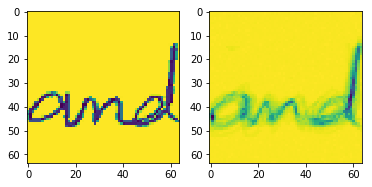

In [47]:
plt.figure(1)
plt.subplot(121)
plt.imshow(images[0].reshape(64,64))

plt.subplot(122)
plt.imshow(pred[0].reshape(64,64))


plt.show()


In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D,Flatten,Reshape
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(64, 64,1))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (64, 64), activation='relu', padding='same')(input_img)
x = Conv2D(1, (64, 64), activation='relu', padding='same')(x)
x = Flatten()(x)

x = Dense(4096, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
encoded = Dense(128, activation='sigmoid')(x)

x = Dense(1024, activation='relu')(encoded)
x = Dense(4096, activation='relu')(x)

x = Reshape((64,64,1))(x)
x = UpSampling2D((8,8))(x)
x = Reshape((64,64,64))(x)
x = Conv2D(64, (64, 64), activation='relu', padding='same')(x)
decoded = Conv2D(1, (64, 64), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        262208    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 1)         262145    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
__________

In [ ]:
x_train, x_test = train_test_split(images, test_size=0.2)
print(x_train.shape)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))  # adapt this if using `channels_first` image data format
# images = images.reshape(64,64,1)

autoencoder.fit(x_train, x_train, batch_size=64, epochs=2000,verbose=True)

(94, 64, 64)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/2000
